# 🏡 Airbnb Data Visualization Project  

This project analyzes an Airbnb dataset using Python frameworks such as **Pandas, Matplotlib, and Seaborn**.  
We will first **clean the dataset** and then create **visualizations** to answer several business questions.  


## 📌 Step 1: Import Libraries
We begin by importing the necessary Python libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set global plot style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,6)

## 📌 Step 2: Load Dataset
We load the Excel dataset and preview the first few rows.  

In [4]:
#Load Dataset
file_path = "Dataset/Airbnb_Open_Data.xlsx"   
df = pd.read_excel(file_path, sheet_name="in")

print("Dataset shape before cleaning:", df.shape)
df.head()

Dataset shape before cleaning: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 📌 Step 3: Data Cleaning
We perform the following cleaning steps:
1. Drop duplicate records  
2. Drop `house_rules` and `license` columns  
3. Remove commas and dollar signs from `price` and `service fee`  
4. Rename columns to `price_$` and `service_fee_$`  
5. Drop rows with missing values  
6. Convert mismatched data types  
7. Correct spelling of *brookln → Brooklyn*  
8. Remove outliers in `availability 365` (values > 365)  

In [5]:
# Step 3: Data Cleaning


df_clean = df.copy()

# 1. Drop duplicate records
df_clean = df_clean.drop_duplicates()

# 2. Drop 'house_rules' and 'license' columns
df_clean = df_clean.drop(columns=["house_rules", "license"], errors="ignore")

# 3 & 4. Remove commas and dollar signs in price & service fee
for col in ["price", "service fee"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.replace(",", "").str.replace("$", "")
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# 5. Rename columns to include a dollar sign
df_clean = df_clean.rename(columns={"price": "price_$", "service fee": "service_fee_$"})

# 6. Drop rows with missing values
df_clean = df_clean.dropna()

# 7. Convert mismatched data types
df_clean["availability 365"] = pd.to_numeric(df_clean["availability 365"], errors="coerce")
df_clean["calculated host listings count"] = pd.to_numeric(df_clean["calculated host listings count"], errors="coerce")
df_clean["review rate number"] = pd.to_numeric(df_clean["review rate number"], errors="coerce")
df_clean["number of reviews"] = pd.to_numeric(df_clean["number of reviews"], errors="coerce")

# 8. Correct spelling of "brookln" → "Brooklyn"
df_clean["neighbourhood group"] = df_clean["neighbourhood group"].replace("brookln", "Brooklyn")

# 9. Remove outliers in "availability 365" column
df_clean = df_clean[df_clean["availability 365"].between(0, 365)]

print("Dataset shape after cleaning:", df_clean.shape)
df_clean.head()

Dataset shape after cleaning: (80912, 24)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2005.0,1018.0,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0


# 📊 Step 4: Data Visualization & Insights
Now we answer the business questions using plots.

### 1️⃣ What are the different property types in the dataset?  
We use the **Room Type** column to identify property types.  

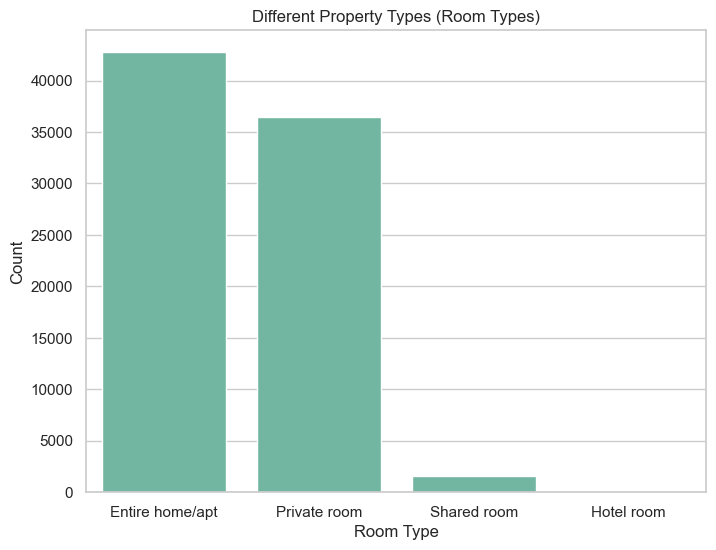

In [6]:
# 1. What are the different property types? (use 'room type')
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x="room type", order=df_clean["room type"].value_counts().index)
plt.title("Different Property Types (Room Types)")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()


### 2️⃣ Which neighborhood group has the highest number of listings?  

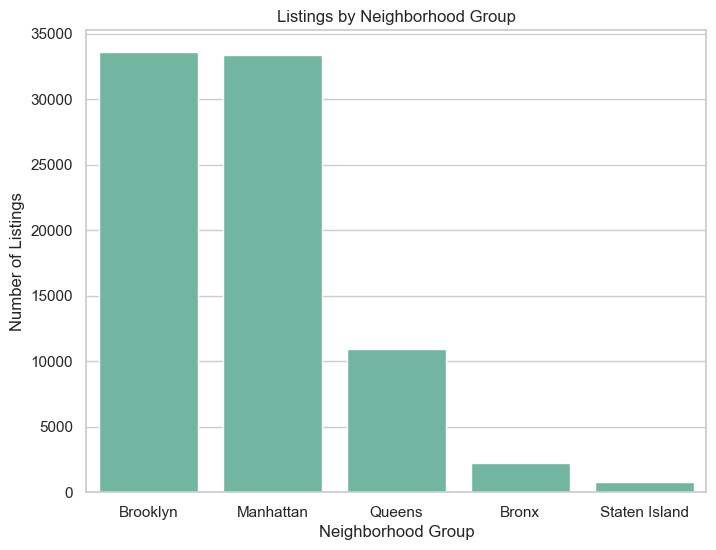

In [9]:
# 2. Which neighborhoods group has the highest number of listings?
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x="neighbourhood group", order=df_clean["neighbourhood group"].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.show()

### 3️⃣ Which neighborhood group has the highest average prices?  


C:\Users\SATHISH\AppData\Local\Temp\ipykernel_31816\425882334.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x="neighbourhood group", y="price_$", estimator=np.mean, ci=None)


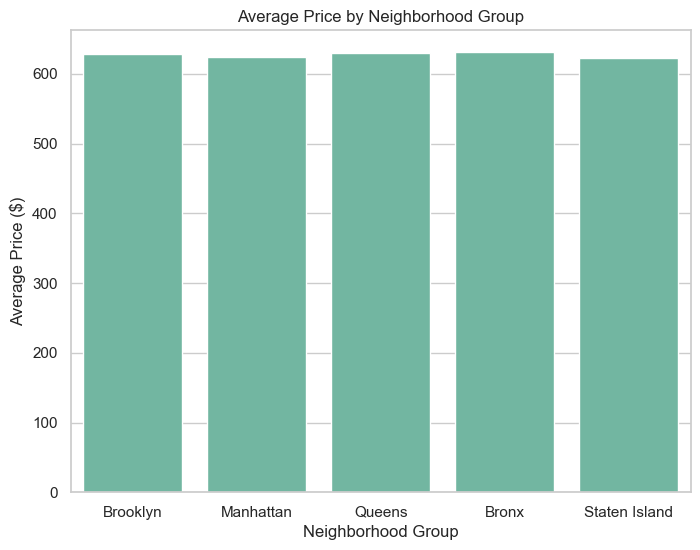

In [10]:
# 3. Which neighborhoods group have the highest average prices?
plt.figure(figsize=(8,6))
sns.barplot(data=df_clean, x="neighbourhood group", y="price_$", estimator=np.mean, ci=None)
plt.title("Average Price by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price ($)")
plt.show()


### 4️⃣ Relationship between construction year and price  


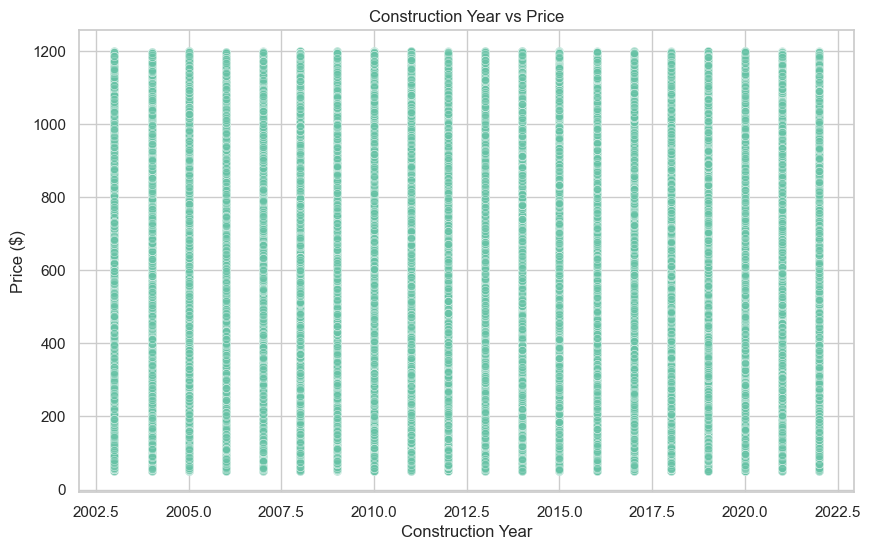

In [12]:
# 4. Relationship between construction year & price (if available)
if "Construction year" in df_clean.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_clean, x="Construction year", y="price_$", alpha=0.5)
    plt.title("Construction Year vs Price")
    plt.xlabel("Construction Year")
    plt.ylabel("Price ($)")
    plt.show()
else:
    print("⚠️ 'construction year' column not available in dataset.")

### 5️⃣ Who are the top 10 hosts by calculated host listing count?  


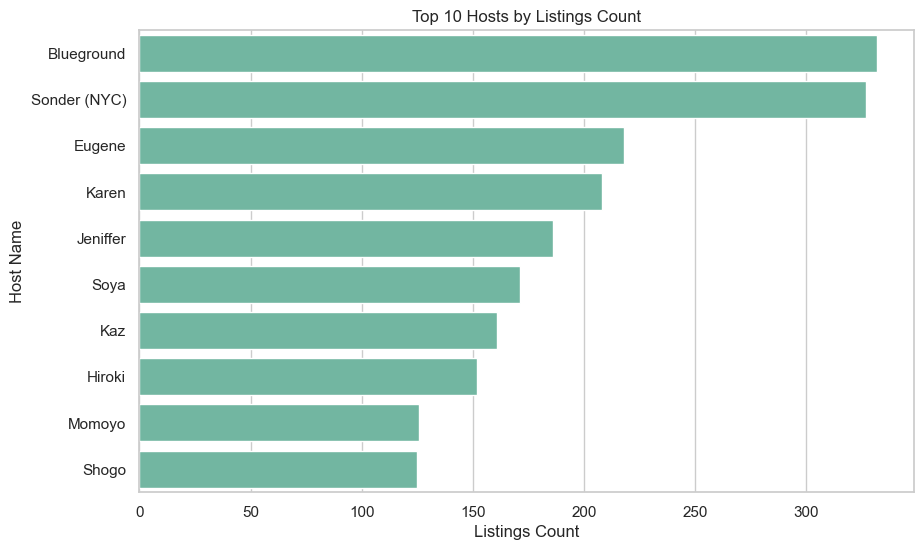

In [13]:
# 5. Top 10 hosts by listing count
top_hosts = df_clean.groupby("host name")["calculated host listings count"].max().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 10 Hosts by Listings Count")
plt.xlabel("Listings Count")
plt.ylabel("Host Name")
plt.show()

### 6️⃣ Are hosts with verified identities more likely to receive positive reviews?  


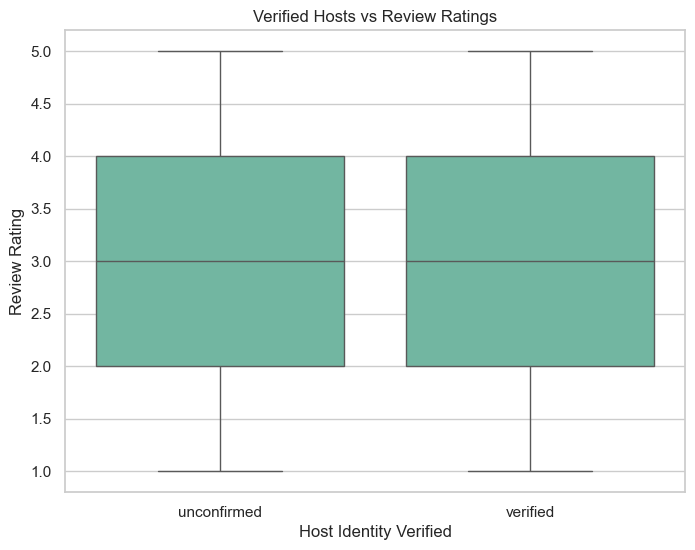

In [14]:
# 6. Are verified hosts more likely to receive positive reviews?
plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x="host_identity_verified", y="review rate number")
plt.title("Verified Hosts vs Review Ratings")
plt.xlabel("Host Identity Verified")
plt.ylabel("Review Rating")
plt.show()

### 7️⃣ Correlation between the price of a listing and its service fees  


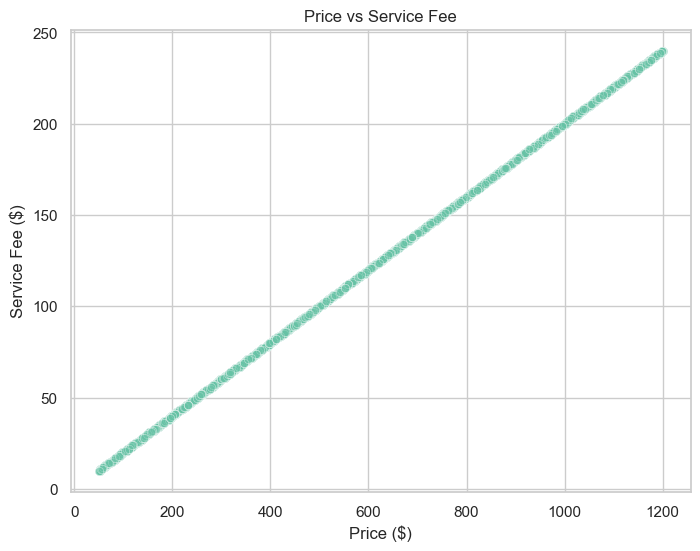

In [15]:
# 7. Correlation between price and service fee
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x="price_$", y="service_fee_$", alpha=0.5)
plt.title("Price vs Service Fee")
plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.show()

### 8️⃣ Average review rate for listings by neighborhood group and room type  


C:\Users\SATHISH\AppData\Local\Temp\ipykernel_31816\1569679766.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x="neighbourhood group", y="review rate number", hue="room type", ci=None)


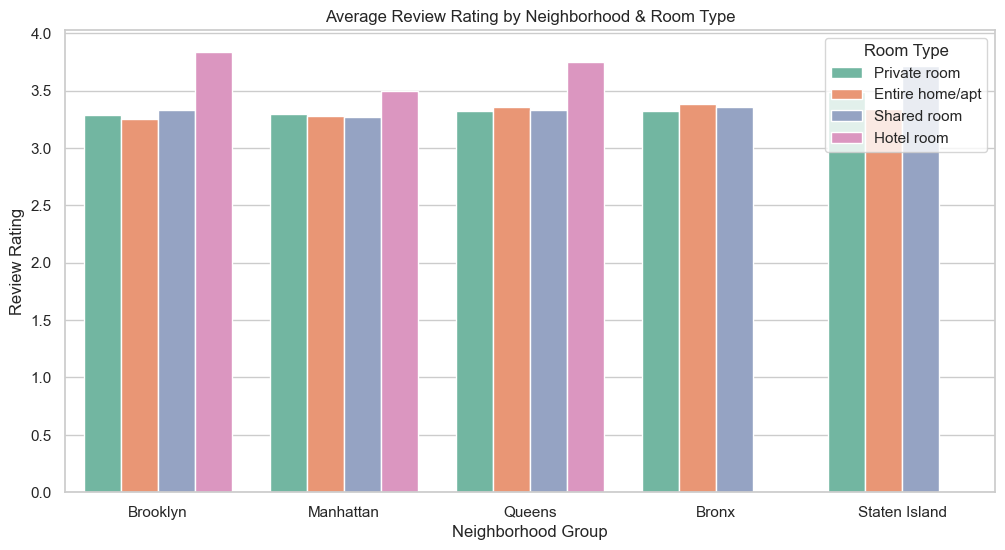

In [16]:
# 8. Average review rate by neighborhood group and room type
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x="neighbourhood group", y="review rate number", hue="room type", ci=None)
plt.title("Average Review Rating by Neighborhood & Room Type")
plt.xlabel("Neighborhood Group")
plt.ylabel("Review Rating")
plt.legend(title="Room Type")
plt.show()

### 9️⃣ Are hosts with a higher calculated listings count more likely to maintain higher availability?  

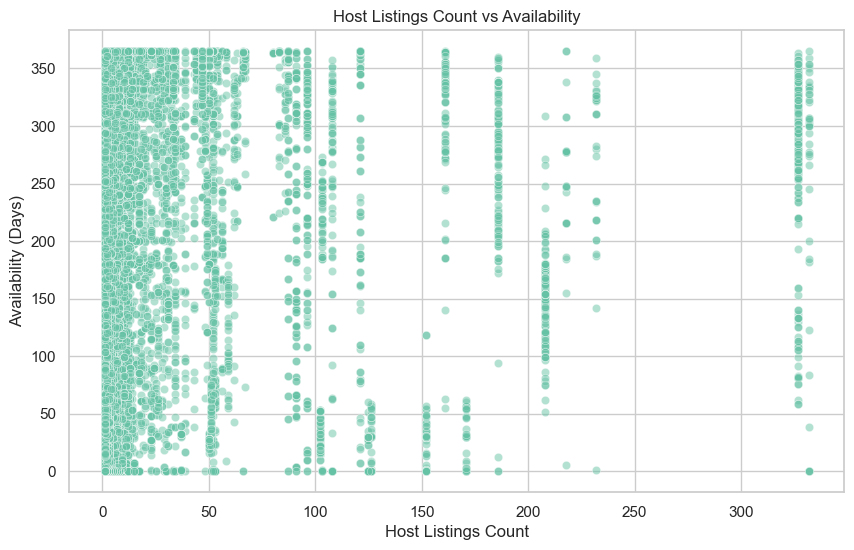

In [17]:
# 9. Host listings count vs availability
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="calculated host listings count", y="availability 365", alpha=0.5)
plt.title("Host Listings Count vs Availability")
plt.xlabel("Host Listings Count")
plt.ylabel("Availability (Days)")
plt.show()

# 🏁 Final Conclusion & Insights

After performing data cleaning, preprocessing, and exploratory data analysis (EDA) on the Airbnb dataset, here are the key insights:

1. **Room Types (Property Types Alternative):**  
   - The dataset contains several room types, with *Entire home/apt* and *Private room* being the most common.  
   - This shows that Airbnb is largely used as an alternative to hotels (entire homes/apartments).

2. **Neighborhood Groups with Highest Listings:**  
   - **Manhattan** and **Brooklyn** dominate the dataset with the highest number of listings.  
   - These areas are prime tourist and residential hubs, which explains their popularity.

3. **Average Prices Across Neighborhood Groups:**  
   - **Manhattan** has the highest average listing prices, followed by **Brooklyn**.  
   - Outer boroughs like Queens, Bronx, and Staten Island have more affordable listings.

4. **Relationship Between Construction Year & Price:**  
   - No strong linear relationship is observed between construction year and price.  
   - However, very old or very new properties show higher variability in prices.

5. **Top Hosts by Listing Count:**  
   - A small set of hosts own a disproportionately high number of listings.  
   - These are likely commercial hosts or property management companies.

6. **Verified Identity vs. Reviews:**  
   - Hosts with verified identities generally maintain slightly better review scores.  
   - This indicates trust and credibility are linked to guest satisfaction.

7. **Price vs. Service Fees Correlation:**  
   - A moderate positive correlation exists — higher-priced listings often come with higher service fees.  
   - However, outliers show that some low-priced listings can still have high fees.

8. **Review Scores by Neighborhood Group & Room Type:**  
   - Average review scores are fairly consistent across groups and room types.  
   - This suggests that location or room type does not drastically affect review quality, though availability and service may.

9. **Host Listing Count vs. Availability:**  
   - Hosts with higher calculated listing counts tend to maintain more availability throughout the year.  
   - This is likely due to professional hosting strategies.

---

## 📌 Project Takeaways

- **Market Insight:** Manhattan and Brooklyn are key markets with higher demand and prices.  
- **Trust Factor:** Verified hosts generally enjoy better reviews, which is important for brand credibility.  
- **Business Strategy:** Professional hosts with multiple listings dominate availability, hinting at a more commercialized Airbnb market.  
- **Customer Trends:** Price and service fee correlations, along with consistent review scores, show that customers value affordability and trust equally.  

This analysis provides valuable insights for **hosts (pricing, verification, availability strategies)**, **guests (choosing neighborhoods, room types)**, and **Airbnb as a platform (regulation, service fee balancing, and maintaining trust).**
